In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_14=pd.read_excel('downloads/all_alpha_14.xlsx',engine='openpyxl')
df_24=pd.read_excel('downloads/all_alpha_24.xlsx',engine='openpyxl')

In [3]:
df_14.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,1.5,4.0,SCV-7,2WD,Gasoline,FA,B2,Federal Tier 2 Bin 2,EHNXV01.58D2,small car,9,39,38,38,9,Yes,228
1,ACURA ILX,1.5,4.0,SCV-7,2WD,Gasoline,CA,PZEV,California PZEV,EHNXV01.58D2,small car,9,39,38,38,9,Yes,228
2,ACURA ILX,2.0,4.0,SemiAuto-5,2WD,Gasoline,FA,B5,Federal Tier 2 Bin 5,EHNXV02.0EB3,small car,5,24,35,28,7,No,318
3,ACURA ILX,2.0,4.0,SemiAuto-5,2WD,Gasoline,CA,U2,California LEV-II ULEV,EHNXV02.0EB3,small car,6,24,35,28,7,Yes,318
4,ACURA ILX,2.4,4.0,Man-6,2WD,Gasoline,FA,B5,Federal Tier 2 Bin 5,EHNXV02.4RB3,small car,5,22,31,25,6,No,361


In [4]:
df_24.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA Integra,1.5,4.0,SCV-7,2WD,Gasoline,CA,L3SULEV30,California LEV-III SULEV30,RHNXV01.54EC,large car,7,30,37,33,6,No,269
1,ACURA Integra,1.5,4.0,SCV-7,2WD,Gasoline,FA,T3B30,Federal Tier 3 Bin 30,RHNXV01.54EC,large car,7,30,37,33,6,No,269
2,ACURA Integra,2.0,4.0,Man-6,2WD,Gasoline,CA,L3ULEV50,California LEV-III ULEV50,RHNXV02.0TDC,large car,6,21,28,24,5,No,371
3,ACURA Integra,2.0,4.0,Man-6,2WD,Gasoline,FA,T3B50,Federal Tier 3 Bin 50,RHNXV02.0TDC,large car,6,21,28,24,5,No,371
4,ACURA Integra A-Spec,1.5,4.0,Man-6,2WD,Gasoline,CA,L3ULEV50,California LEV-III ULEV50,RHNXV01.55DC,large car,6,26,36,30,6,No,293


In [5]:
df_14.shape,df_24.shape

((2517, 18), (2448, 18))

In [6]:
#lets rename all columns by removing spaces and replacing it with '_'
df_14.rename(columns=lambda x:x.strip().replace(' ','_'),inplace=True)
df_24.rename(columns=lambda x:x.strip().replace(' ','_'),inplace=True)

In [28]:
#Lets see if the two Datasets have same columns
df_14.columns==df_24.columns

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [50]:
#so the columns name sales area and cert region are different but the data represented by both columns are similar !
df_24.rename(columns={'Cert_Region':'Sales_Area'},inplace=True)

In [51]:
#Now lets recheck columns
df_14.columns==df_24.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [58]:
df_14.duplicated().sum(),df_24.duplicated().sum()

(22, 0)

In [60]:
df_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2517 non-null   object 
 1   Displ                 2487 non-null   float64
 2   Cyl                   2487 non-null   float64
 3   Trans                 2517 non-null   object 
 4   Drive                 2517 non-null   object 
 5   Fuel                  2517 non-null   object 
 6   Sales_Area            2517 non-null   object 
 7   Stnd                  2517 non-null   object 
 8   Stnd_Description      2517 non-null   object 
 9   Underhood_ID          2517 non-null   object 
 10  Veh_Class             2517 non-null   object 
 11  Air_Pollution_Score   2517 non-null   object 
 12  City_MPG              2320 non-null   object 
 13  Hwy_MPG               2320 non-null   object 
 14  Cmb_MPG               2320 non-null   object 
 15  Greenhouse_Gas_Score 

In [61]:
df_24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2448 entries, 0 to 2447
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2448 non-null   object 
 1   Displ                 1995 non-null   float64
 2   Cyl                   1995 non-null   float64
 3   Trans                 2448 non-null   object 
 4   Drive                 2448 non-null   object 
 5   Fuel                  2448 non-null   object 
 6   Sales_Area            2448 non-null   object 
 7   Stnd                  2448 non-null   object 
 8   Stnd_Description      2448 non-null   object 
 9   Underhood_ID          2448 non-null   object 
 10  Veh_Class             2448 non-null   object 
 11  Air_Pollution_Score   2448 non-null   int64  
 12  City_MPG              2448 non-null   object 
 13  Hwy_MPG               2448 non-null   object 
 14  Cmb_MPG               2448 non-null   object 
 15  Greenhouse_Gas_Score  2448

In [64]:
df_14.isna().sum()

Model                     0
Displ                    30
Cyl                      30
Trans                     0
Drive                     0
Fuel                      0
Sales_Area                0
Stnd                      0
Stnd_Description          0
Underhood_ID              0
Veh_Class                 0
Air_Pollution_Score       0
City_MPG                197
Hwy_MPG                 197
Cmb_MPG                 197
Greenhouse_Gas_Score    197
SmartWay                  0
Comb_CO2                197
dtype: int64

In [65]:
df_24.isna().sum()

Model                     0
Displ                   453
Cyl                     453
Trans                     0
Drive                     0
Fuel                      0
Sales_Area                0
Stnd                      0
Stnd_Description          0
Underhood_ID              0
Veh_Class                 0
Air_Pollution_Score       0
City_MPG                  0
Hwy_MPG                   0
Cmb_MPG                   0
Greenhouse_Gas_Score      0
SmartWay                  0
Comb_CO2                  0
dtype: int64

In [70]:
df_14.nunique()

Model                   587
Displ                    49
Cyl                       9
Trans                    26
Drive                     2
Fuel                      8
Sales_Area                3
Stnd                     20
Stnd_Description         20
Underhood_ID            408
Veh_Class                10
Air_Pollution_Score       9
City_MPG                 89
Hwy_MPG                 105
Cmb_MPG                  90
Greenhouse_Gas_Score     11
SmartWay                  4
Comb_CO2                447
dtype: int64

In [73]:
df_24.nunique()

Model                   836
Displ                    33
Cyl                       8
Trans                    26
Drive                     2
Fuel                      6
Sales_Area                2
Stnd                     15
Stnd_Description         15
Underhood_ID            415
Veh_Class                 9
Air_Pollution_Score       7
City_MPG                157
Hwy_MPG                 137
Cmb_MPG                 154
Greenhouse_Gas_Score     10
SmartWay                  3
Comb_CO2                383
dtype: int64

In [77]:
#Lets drop the columns which are not relevant to our question!
df_14.drop(['Stnd','Underhood_ID','Comb_CO2','Stnd_Description'],axis=1,inplace=True)
# We would drop the same column for 2024 Dataset
df_24.drop(['Stnd','Underhood_ID','Comb_CO2','Stnd_Description'],axis=1,inplace=True)

In [81]:
(df_14.columns==df_24.columns).all()

True

In [80]:
#Lets make the column lower case for easy writing operations
df_14.rename(columns=lambda x:x.strip().lower(),inplace=True)
df_24.rename(columns=lambda x:x.strip().lower(),inplace=True)

In [83]:
df_14['sales_area'].value_counts()

sales_area
FA    1126
CA    1079
FC     312
Name: count, dtype: int64

In [89]:
# AS we only need data of CA (california) we would filter that out
df_14=df_14[df_14['sales_area']=='CA']
df_24=df_24[df_24['sales_area']=='CA']

In [92]:
df_14['sales_area'].value_counts(),df_24['sales_area'].value_counts()

(sales_area
 CA    1079
 Name: count, dtype: int64,
 sales_area
 CA    1225
 Name: count, dtype: int64)

In [94]:
#Now we would drop sales area as we already have specific area sales
df_14.drop('sales_area',axis=1,inplace=True)
df_24.drop('sales_area',axis=1,inplace=True)

In [95]:
df_14.shape,df_24.shape

((1079, 13), (1225, 13))

In [96]:
df_14.isna().sum()

model                    0
displ                   14
cyl                     14
trans                    0
drive                    0
fuel                     0
veh_class                0
air_pollution_score      0
city_mpg                76
hwy_mpg                 76
cmb_mpg                 76
greenhouse_gas_score    76
smartway                 0
dtype: int64

In [97]:
df_24.isna().sum()

model                     0
displ                   228
cyl                     228
trans                     0
drive                     0
fuel                      0
veh_class                 0
air_pollution_score       0
city_mpg                  0
hwy_mpg                   0
cmb_mpg                   0
greenhouse_gas_score      0
smartway                  0
dtype: int64

In [99]:
#we would drop the NULL values
df_14.dropna(inplace=True)
df_24.dropna(inplace=True)

In [105]:
df_14.isna().sum().any(),df_24.isna().sum().any()

(False, False)

In [108]:
# Now lets remove duplicate Data
df_14.duplicated().sum(),df_24.duplicated().sum()

(9, 14)

In [109]:
df_14.drop_duplicates(inplace=True)
df_24.drop_duplicates(inplace=True)

In [110]:
df_14.duplicated().sum(),df_24.duplicated().sum()

(0, 0)

In [111]:
df_14.shape,df_24.shape

((980, 13), (983, 13))

<h2>INSPECTING DATA TYPES:</h2>

In [134]:
df_14.info()

<class 'pandas.core.frame.DataFrame'>
Index: 959 entries, 1 to 2516
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 959 non-null    object 
 1   displ                 959 non-null    float64
 2   cyl                   959 non-null    float64
 3   trans                 959 non-null    object 
 4   drive                 959 non-null    object 
 5   fuel                  959 non-null    object 
 6   veh_class             959 non-null    object 
 7   air_pollution_score   959 non-null    object 
 8   city_mpg              959 non-null    object 
 9   hwy_mpg               959 non-null    object 
 10  cmb_mpg               959 non-null    object 
 11  greenhouse_gas_score  959 non-null    object 
 12  smartway              959 non-null    object 
dtypes: float64(2), object(11)
memory usage: 104.9+ KB


In [135]:
df_24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 983 entries, 0 to 2446
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 983 non-null    object 
 1   displ                 983 non-null    float64
 2   cyl                   983 non-null    float64
 3   trans                 983 non-null    object 
 4   drive                 983 non-null    object 
 5   fuel                  983 non-null    object 
 6   veh_class             983 non-null    object 
 7   air_pollution_score   983 non-null    int64  
 8   city_mpg              983 non-null    object 
 9   hwy_mpg               983 non-null    object 
 10  cmb_mpg               983 non-null    object 
 11  greenhouse_gas_score  983 non-null    int64  
 12  smartway              983 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 107.5+ KB


In [124]:
df_14['air_pollution_score'].value_counts()

air_pollution_score
6      617
5      191
9      108
8       41
Mod     21
7        2
Name: count, dtype: int64

In [138]:
df_14['greenhouse_gas_score'].dtype

dtype('O')

In [126]:
#Lets remove 'Mod' values from air_pollution_score column in 2014 dataset
df_14['air_pollution_score'].replace('Mod',np.nan,inplace=True)

In [127]:
df_14.dropna(inplace=True)

In [129]:
df_14['air_pollution_score'].value_counts()

air_pollution_score
6    617
5    191
9    108
8     41
7      2
Name: count, dtype: int64

In [139]:
df_14['cmb_mpg'].value_counts()

cmb_mpg
21        79
26        73
19        62
22        55
20        55
23        54
28        53
25        53
18        52
30        48
24        43
27        40
15        35
29        31
16        30
31        30
17        29
14        25
32        12
33        11
13        10
34         6
35         6
37         6
42         5
40         5
38         4
11/16      3
13/18      3
17/23      3
18/23      3
11/15      3
16/24      3
14/19      2
45         2
38/88      2
36         2
50         2
15/19      1
17/18      1
25/50      1
41         1
15/22      1
10         1
14/21      1
12         1
14/20      1
28/76      1
15/21      1
47         1
16/23      1
15/23      1
10/14      1
37/98      1
39/117     1
33/82      1
50/95      1
Name: count, dtype: int64

<h3>By observing the Data using .info() we found:</h3>
<font size="3">1.converting 'cyl' column data type from float to int.<br>
2.converting 'air_pollution_score' column dtype object to float.<br>
3.converting 'greenhouse_gas_score' column dtype for 2014 from object to int.<br>
4.Fix city_mpg,hwy_mpg,cmb_mpg Fixing rows values containing '/' and fixing dtypes.
  

In [158]:
# 'cyl'column
df_14['cyl']=df_14['cyl'].astype('int')
df_24['cyl']=df_24['cyl'].astype('int')

In [159]:
df_14['cyl'].dtype,df_24['cyl'].dtype

(dtype('int64'), dtype('int64'))

In [160]:
# 'air_pollution_score' column
df_14['air_pollution_score']=df_14['air_pollution_score'].astype('float') #only need to fix df_14 df_24 is already 'float' dtype

In [161]:
df_14['air_pollution_score'].dtype

dtype('float64')

In [251]:
# 'greehouse_gas_score' column
df_14['greenhouse_gas_score']=df_14['greenhouse_gas_score'].astype('float')#only need to fix df_14 df_24 is already 'float' dtype

In [250]:
df_14['air_pollution_score'].dtype

dtype('float64')

<font size="3"> The mpg columns('city_mpg','hwy_mpg,'cmb_mpg') seem to have a problem some values in rows are seprated by '/',maybe that 
why they are saved as string.<br>
<font size="3"> According to [This Link](https://www.fueleconomy.gov/feg/findacarhelp.shtml#airPollutionScore).<font size="3"> I found that **'If a vehical can operate on more than one type of fuel an estimate is provided for each fuel type**."<br>
<font size='3'> So all vehicles with more than one fuel type,or hybrid will have a string that holds two values -one for each.



In [169]:
# First lets get all the hybrids for 2014
hy_14=df_14[df_14['fuel'].str.contains('/')]

In [179]:
hy_14.shape  #37 values for 2014 dataset

(37, 13)

In [174]:
hy_14.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
49,AUDI A4,2.0,4,SemiAuto-8,4WD,Ethanol/Gas,small car,6.0,14/20,20/29,16/24,6.0,No
55,AUDI A5,2.0,4,SemiAuto-8,4WD,Ethanol/Gas,small car,6.0,14/20,20/29,16/24,6.0,No
57,AUDI A5 Cabriolet,2.0,4,SemiAuto-8,4WD,Ethanol/Gas,small car,6.0,14/20,20/29,16/24,6.0,No
79,AUDI Q5,2.0,4,SemiAuto-8,4WD,Ethanol/Gas,small SUV,6.0,14/20,19/28,16/23,6.0,No
135,AUDI allroad quattro,2.0,4,SemiAuto-8,4WD,Ethanol/Gas,station wagon,6.0,14/20,18/27,15/23,6.0,No


In [176]:
hy_24=df_24[df_24['fuel'].str.contains('/')]

In [178]:
hy_24.shape # 52 values for 2024 dataset

(52, 13)

In [180]:
hy_24.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
36,ALFA ROMEO Tonale eAWD,1.3,4,Auto-6,4WD,Gasoline/Electricity,small SUV,6,29/77,29/77,29/77,9,No
84,AUDI Q5 Plug-In Hybrid quattro,2.0,4,AMS-7,4WD,Gasoline/Electricity,small SUV,7,25/55,27/61,26/58,9,Yes
156,BENTLEY Bentayga Hybrid,3.0,6,SemiAuto-8,4WD,Gasoline/Electricity,standard SUV,3,19/41,23/43,21/42,8,No
170,BENTLEY Flying Spur Hybrid,2.9,6,AMS-8,4WD,Gasoline/Electricity,midsize car,5,17/43,22/50,19/46,7,No
182,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,small car,7,24/69,32/78,27/73,8,Yes


<font size='3'> We’re are going to take each hybrid rows and split them into two new rows.<br>
<font size='3'> One with values before '/' and other with after.

In [181]:
df1=hy_14.copy()
df2=hy_14.copy()

In [184]:
df1.head()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
49,AUDI A4,2.0,4,SemiAuto-8,4WD,Ethanol/Gas,small car,6.0,14/20,20/29,16/24,6.0,No
55,AUDI A5,2.0,4,SemiAuto-8,4WD,Ethanol/Gas,small car,6.0,14/20,20/29,16/24,6.0,No
57,AUDI A5 Cabriolet,2.0,4,SemiAuto-8,4WD,Ethanol/Gas,small car,6.0,14/20,20/29,16/24,6.0,No
79,AUDI Q5,2.0,4,SemiAuto-8,4WD,Ethanol/Gas,small SUV,6.0,14/20,19/28,16/23,6.0,No
135,AUDI allroad quattro,2.0,4,SemiAuto-8,4WD,Ethanol/Gas,station wagon,6.0,14/20,18/27,15/23,6.0,No


In [185]:
split_columns=['city_mpg','hwy_mpg','cmb_mpg','fuel'] # columns with split values '/'

In [187]:
for i in split_columns:
    df1[i]=df1[i].apply(lambda x:x.split('/')[0])
    df2[i]=df2[i].apply(lambda x:x.split('/')[1])

In [203]:
df1.head() # This dataframe hold the value before the '/'

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
49,AUDI A4,2.0,4,SemiAuto-8,4WD,Ethanol,small car,6.0,14,20,16,6.0,No
55,AUDI A5,2.0,4,SemiAuto-8,4WD,Ethanol,small car,6.0,14,20,16,6.0,No
57,AUDI A5 Cabriolet,2.0,4,SemiAuto-8,4WD,Ethanol,small car,6.0,14,20,16,6.0,No
79,AUDI Q5,2.0,4,SemiAuto-8,4WD,Ethanol,small SUV,6.0,14,19,16,6.0,No
135,AUDI allroad quattro,2.0,4,SemiAuto-8,4WD,Ethanol,station wagon,6.0,14,18,15,6.0,No


In [192]:
#now lest combine both df1 and df2
new_value=pd.concat([df1,df2])

In [206]:
new_value.tail()

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
1592,MERCEDES-BENZ E350 Convertible,3.5,6,Auto-7,2WD,Gas,small car,6.0,20,28,23,6.0,No
1638,MERCEDES-BENZ ML350 4Matic,3.5,6,Auto-7,4WD,Gas,standard SUV,6.0,17,22,19,4.0,No
1823,McLAREN P1,3.8,8,Auto-7,2WD,Electricity,small car,5.0,16,21,18,4.0,No
2030,PORSCHE Panamera S E-Hybrid,3.0,6,AMS-8,2WD,Electricity,large car,6.0,42,66,50,10.0,Yes
2302,TOYOTA Prius Plug-in Hybrid,1.8,4,CVT,2WD,Electricity,midsize car,9.0,90,102,95,10.0,Elite


In [194]:
# Now lets drop the rows with split'/' values in original DATAFRAME of 2014
df_14.drop(hy_14.index,inplace=True)

In [205]:
df_14['fuel'].value_counts()

fuel
Gasoline       922
Ethanol         28
Gas             28
Electricity      9
Diesel           7
CNG              2
Name: count, dtype: int64

In [199]:
df_14 = pd.concat([df_14, new_value], ignore_index=True)

In [201]:
df_14.tail()


,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
991,MERCEDES-BENZ E350 Convertible,3.5,6,Auto-7,2WD,Gas,small car,6.0,20,28,23,6.0,No
992,MERCEDES-BENZ ML350 4Matic,3.5,6,Auto-7,4WD,Gas,standard SUV,6.0,17,22,19,4.0,No
993,McLAREN P1,3.8,8,Auto-7,2WD,Electricity,small car,5.0,16,21,18,4.0,No
994,PORSCHE Panamera S E-Hybrid,3.0,6,AMS-8,2WD,Electricity,large car,6.0,42,66,50,10.0,Yes
995,TOYOTA Prius Plug-in Hybrid,1.8,4,CVT,2WD,Electricity,midsize car,9.0,90,102,95,10.0,Elite


In [202]:
# lets do same for 2024 dataset


In [204]:
df3=hy_24.copy()
df4=hy_24.copy()

In [207]:
split_columns=['city_mpg','hwy_mpg','cmb_mpg','fuel']
for i in split_columns:
    df3[i]=df3[i].apply(lambda x:x.split('/')[0])
    df4[i]=df4[i].apply(lambda x:x.split('/')[1])
    

In [420]:
new_row=pd.concat([df3,df4])

In [419]:
new_row

,model,displ,cyl,trans,drive,fuel,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
36,ALFA ROMEO Tonale eAWD,1.3,4,Auto-6,4WD,Gasoline,small SUV,6,29,29,29,9,No
84,AUDI Q5 Plug-In Hybrid quattro,2.0,4,AMS-7,4WD,Gasoline,small SUV,7,25,27,26,9,Yes
156,BENTLEY Bentayga Hybrid,3.0,6,SemiAuto-8,4WD,Gasoline,standard SUV,3,19,23,21,8,No
170,BENTLEY Flying Spur Hybrid,2.9,6,AMS-8,4WD,Gasoline,midsize car,5,17,22,19,7,No
182,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline,small car,7,24,32,27,8,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420,VOLVO S60 T8 Recharge,2.0,4,SemiAuto-8,4WD,Electricity,small car,7,74,73,74,9,Yes
2424,VOLVO S90 T8 Recharge,2.0,4,SemiAuto-8,4WD,Electricity,midsize car,7,66,67,66,9,Yes
2426,VOLVO V60 T8 Recharge,2.0,4,SemiAuto-8,4WD,Electricity,station wagon,7,74,73,74,9,Yes
2440,VOLVO XC60 T8 Recharge,2.0,4,SemiAuto-8,4WD,Electricity,small SUV,7,66,60,63,9,Yes


In [ ]:
df_24.drop(hy_24.index,inplace=True)

In [240]:
df_24 = pd.concat([df_24, new_row], ignore_index=True)

In [241]:
df_24.shape

(1035, 13)

In [242]:
df_24['fuel'].value_counts()

fuel
Gasoline       957
Electricity     45
Diesel          19
Ethanol          7
Gas              7
Name: count, dtype: int64

In [244]:
# Now lets convert our columns to float('city_mpg','hwy_mpg','cmb_mpg')
j=['city_mpg','hwy_mpg','cmb_mpg']
for i in j:
    df_14[i]=df_14[i].astype('float')
    df_24[i]=df_24[i].astype('float')

In [245]:
df_14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 996 non-null    object 
 1   displ                 996 non-null    float64
 2   cyl                   996 non-null    int64  
 3   trans                 996 non-null    object 
 4   drive                 996 non-null    object 
 5   fuel                  996 non-null    object 
 6   veh_class             996 non-null    object 
 7   air_pollution_score   996 non-null    float64
 8   city_mpg              996 non-null    float64
 9   hwy_mpg               996 non-null    float64
 10  cmb_mpg               996 non-null    float64
 11  greenhouse_gas_score  996 non-null    float64
 12  smartway              996 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 101.3+ KB


In [258]:
df_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 1035 non-null   object 
 1   displ                 1035 non-null   float64
 2   cyl                   1035 non-null   int64  
 3   trans                 1035 non-null   object 
 4   drive                 1035 non-null   object 
 5   fuel                  1035 non-null   object 
 6   veh_class             1035 non-null   object 
 7   air_pollution_score   1035 non-null   float64
 8   city_mpg              1035 non-null   float64
 9   hwy_mpg               1035 non-null   float64
 10  cmb_mpg               1035 non-null   float64
 11  greenhouse_gas_score  1035 non-null   int64  
 12  smartway              1035 non-null   object 
dtypes: float64(5), int64(2), object(6)
memory usage: 105.2+ KB


In [260]:
(df_14.dtypes==df_24.dtypes).all()

True

<font size='4'> Now our data is clean lets move to visualization.

**<h3> EXPLORING WITH VISUALS <h3>**

<font size='4'> Compare the Distributions of greenhouse gas score in 2014 and 2024

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


<Axes: >

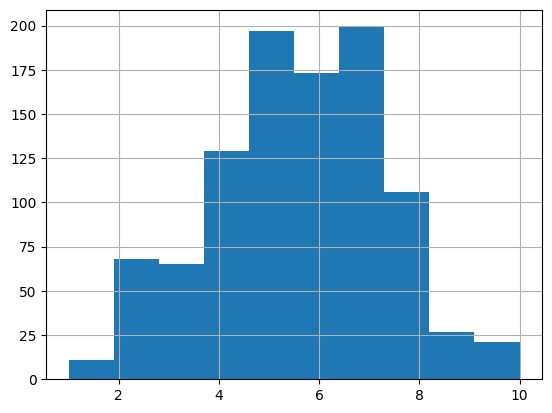

In [269]:
#greenhouse gas score for 2014
df_14['greenhouse_gas_score'].hist()

<Axes: >

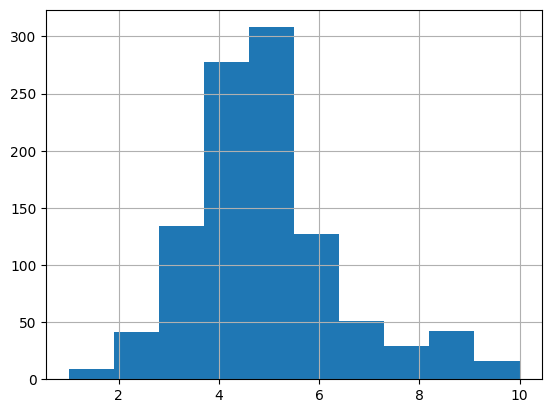

In [270]:
#greenhouse gas score for 2024
df_24['greenhouse_gas_score'].hist()

/var/folders/zk/r0t9kfd15wn1vd9h8c04twc00000gn/T/ipykernel_28052/3084026743.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_14['greenhouse_gas_score'], shade=True, color='red')


Text(0, 0.5, 'Density')

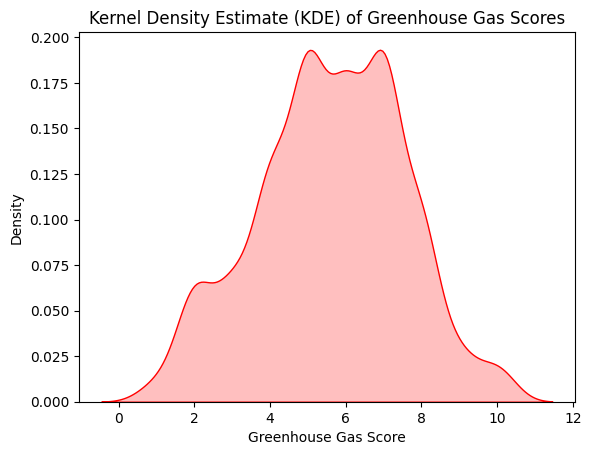

In [284]:
sns.kdeplot(df_14['greenhouse_gas_score'], shade=True, color='red')
plt.title('Kernel Density Estimate (KDE) of Greenhouse Gas Scores')
plt.xlabel('Greenhouse Gas Score')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

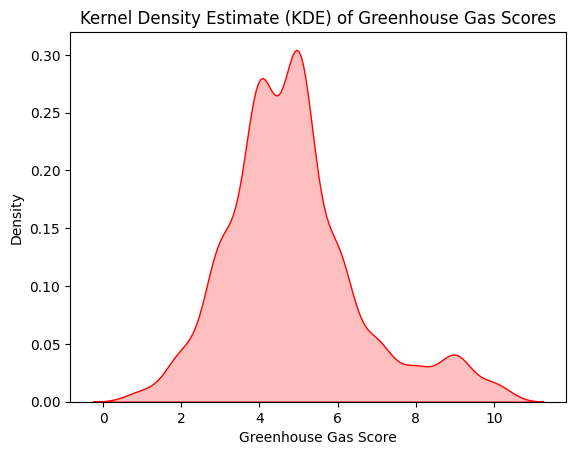

In [282]:
sns.kdeplot(df_24['greenhouse_gas_score'], fill=True, color='red')
plt.title('Kernel Density Estimate (KDE) of Greenhouse Gas Scores')
plt.xlabel('Greenhouse Gas Score')
plt.ylabel('Density')

In [298]:
len(df_24['greenhouse_gas_score']),len(df_14['greenhouse_gas_score'])

(1035, 996)

<h3>Correlation Between displacement('displ') & Combined mpg('cmb_mpg')</h3> 

<Axes: xlabel='displ', ylabel='cmb_mpg'>

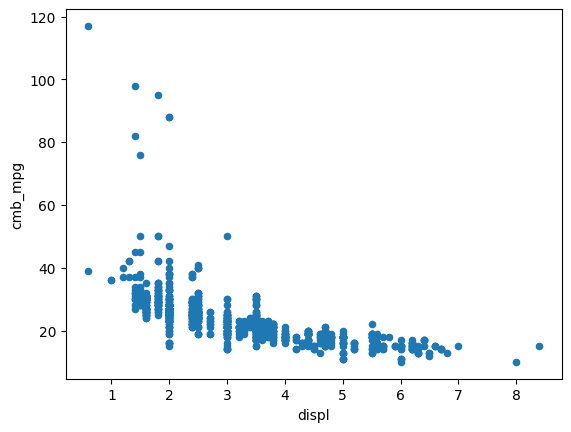

In [304]:
# scatter plot
df_14.plot(x='displ',y='cmb_mpg',kind='scatter')

<Axes: xlabel='displ', ylabel='cmb_mpg'>

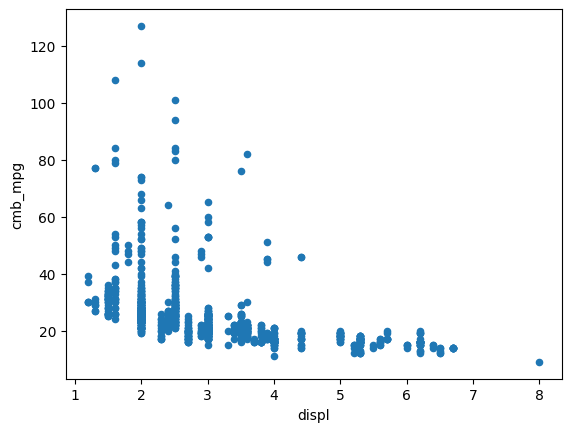

In [310]:
df_24.plot(x='displ',y='cmb_mpg',kind='scatter')

<font size='4'> By above scatter plot for both dataset we can say that there is negative correlation. The **higher** the 
engine displacement,the **lower** the combined (city/highway) fuel economy in miles per gallon.

<h3> Correlation between greenhouse gas score and combined mpg</h3>

<Axes: xlabel='greenhouse_gas_score', ylabel='cmb_mpg'>

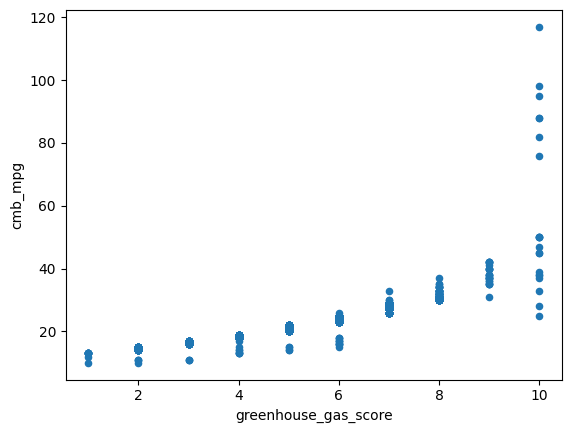

In [311]:
#scatter plot
df_14.plot(x='greenhouse_gas_score',y='cmb_mpg',kind='scatter')

<Axes: xlabel='greenhouse_gas_score', ylabel='cmb_mpg'>

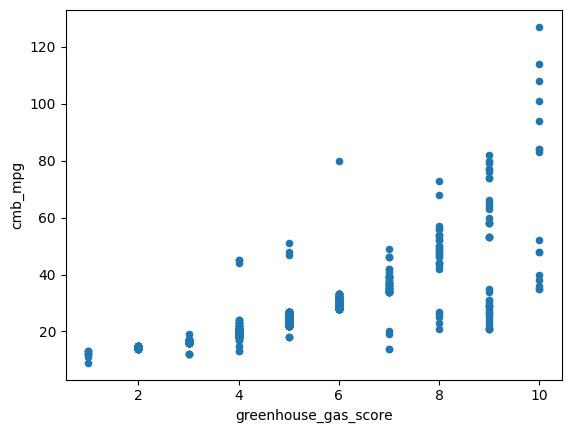

In [312]:
df_24.plot(x='greenhouse_gas_score',y='cmb_mpg',kind='scatter')

<font size='4'> By above scatter plots we can say that there is **positive** correlation between greenhouse gas score and combined mpg.<br>
So with **higher** the greenhouse score rating,**higher** the cmb_mpg.

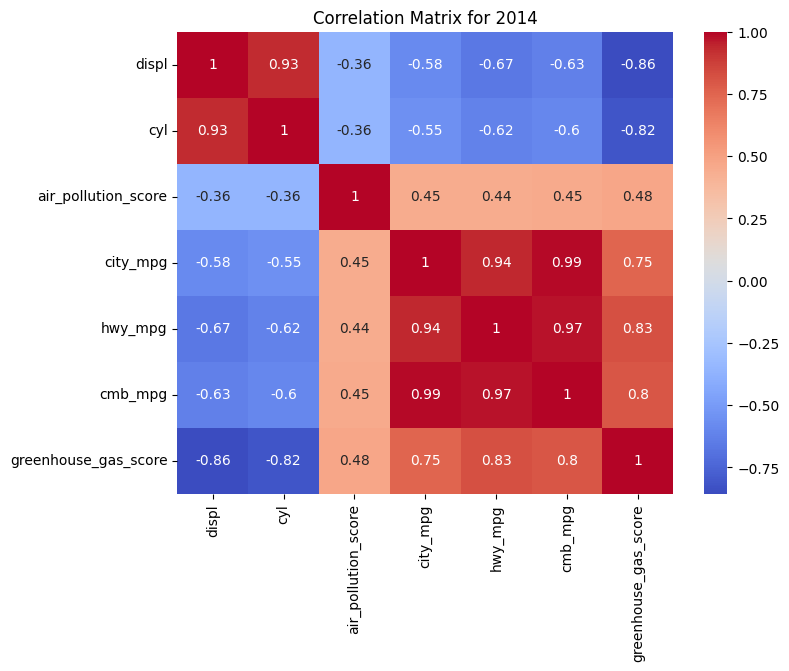

In [323]:
numeric_df14=df_14.select_dtypes(['int','float'])
plt.figure(figsize=(8,6))
sns.heatmap(data=numeric_df14.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix for 2014')
plt.show()

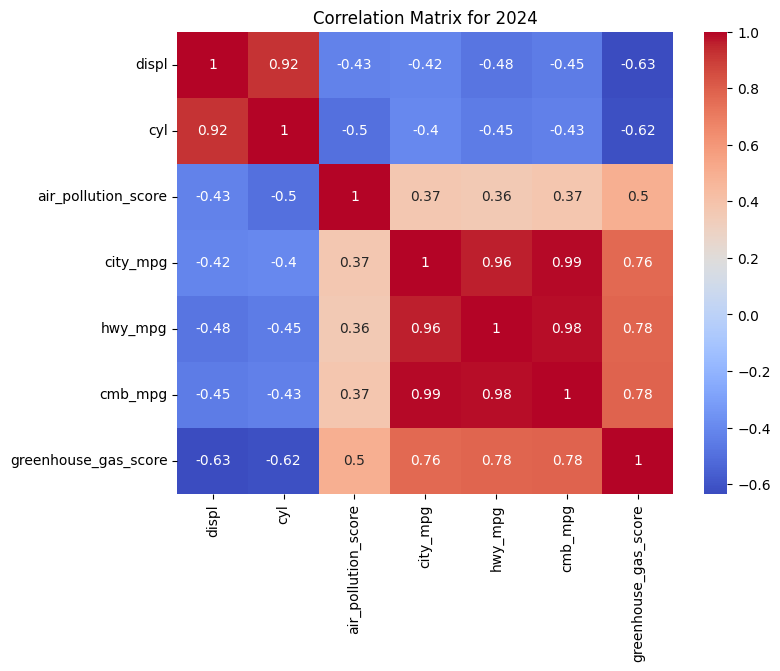

In [326]:
numeric_df24=df_24.select_dtypes([int,float])
plt.figure(figsize=(8,6))
sns.heatmap(data=numeric_df24.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix for 2024')
plt.show()

<h2> Drawing Conclusions</h2>

<font size='4'>Q1: Are more unique models using alternative sources of fuel? By how much?

In [391]:
# Get number of fuel sources counts for 2014
df_14['fuel'].value_counts()

fuel
Gasoline       922
Ethanol         28
Gas             28
Electricity      9
Diesel           7
CNG              2
Name: count, dtype: int64

In [392]:
# Get number of fuel sources counts for 2024
df_24['fuel'].value_counts()

fuel
Gasoline       957
Electricity     45
Diesel          19
Ethanol          7
Gas              7
Name: count, dtype: int64

<font size='3'>Looks like the alternative sources of fuel available in 2014 is Ethanol,Electricity and CNG.For 2024 alternative source is Ethanol and Electricity.([Based on Alternative Fuel Data Center](https://afdc.energy.gov/fuels))

In [393]:
#getting unique models that uses alternative fuel for 2014 dataset
alt_14=df_14['model'].loc[df_14['fuel'].isin(['Ethanol', 'Electricity', 'CNG'])].nunique()

In [394]:
alt_14

33

In [395]:
#getting unique models that uses alternative fuel for 2024 dataset
alt_24=df_24['model'].loc[df_24['fuel'].isin(['Ethanol', 'Electricity'])].nunique()

In [396]:
alt_24

49

Text(0, 0.5, 'Number of Unique Models')

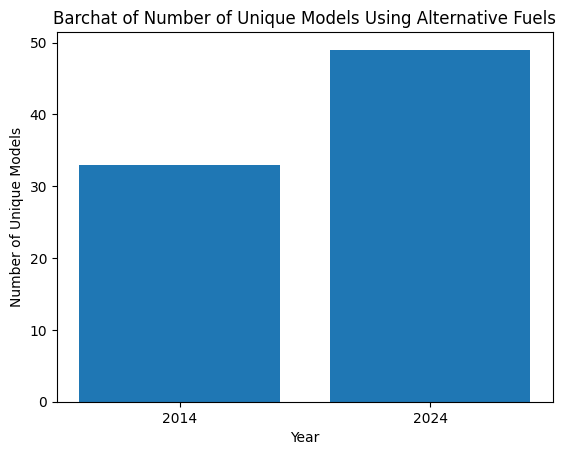

In [397]:
# Plotting bar chart
plt.bar(["2014", "2024"], [alt_14, alt_24])
plt.title("Barchat of Number of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models")


<font size='3'>Since 2014, the number of unique models using alternative sources have increased by 33 to 49. From the bar chart, we can also see that their are slightly higher number of unique models using alternative fuels in 2024.

In [398]:
# Find the total unique models each year
total_14=df_14['model'].nunique()
total_24=df_24['model'].nunique()

In [399]:
# Get proportion of alternative fuel against total unique models
prop_14=alt_14/total_14*100
prop_24=alt_24/total_24*100

In [400]:
prop_14,prop_24

(6.976744186046512, 7.877813504823152)

Text(0, 0.5, 'Number of Unique Models')

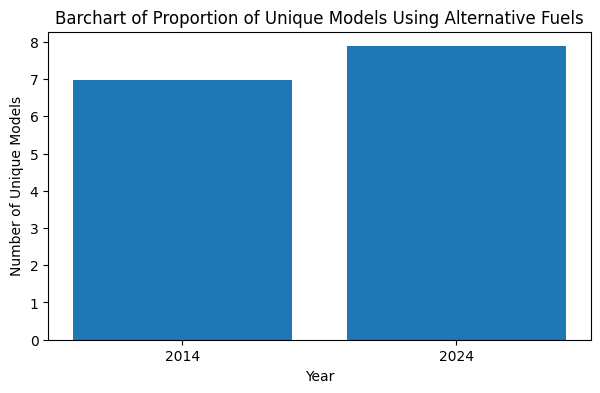

In [401]:
# ploting bar chart
plt.figure(figsize=(7,4))
plt.bar(['2014','2024'],[prop_14,prop_24])
plt.title("Barchart of Proportion of Unique Models Using Alternative Fuels")
plt.xlabel("Year")
plt.ylabel("Number of Unique Models")

<font size='4'>Q2: How much have vehicle classes improved in fuel economy?

In [404]:
df_14['veh_class'].value_counts()

veh_class
small car          417
midsize car        198
small SUV          144
large car           87
standard SUV        72
station wagon       36
pickup              26
special purpose      7
minivan              7
van                  2
Name: count, dtype: int64

In [405]:
df_24['veh_class'].value_counts()

veh_class
small car          267
small SUV          256
standard SUV       192
midsize car        116
pickup             116
large car           48
station wagon       23
minivan              9
special purpose      8
Name: count, dtype: int64

In [406]:
veh_class_14=df_14.groupby('veh_class')['cmb_mpg'].mean()

In [408]:
veh_class_14

veh_class
large car          21.011494
midsize car        26.883838
minivan            21.571429
pickup             17.730769
small SUV          22.652778
small car          24.657074
special purpose    22.428571
standard SUV       17.888889
station wagon      24.972222
van                16.000000
Name: cmb_mpg, dtype: float64

In [409]:
veh_class_24=df_24.groupby('veh_class')['cmb_mpg'].mean()
veh_class_24

veh_class
large car          26.500000
midsize car        30.543103
minivan            32.333333
pickup             18.758621
small SUV          28.886719
small car          24.022472
special purpose    19.875000
standard SUV       22.229167
station wagon      27.043478
Name: cmb_mpg, dtype: float64

In [410]:
variance=veh_class_24-veh_class_14
variance

veh_class
large car           5.488506
midsize car         3.659265
minivan            10.761905
pickup              1.027851
small SUV           6.233941
small car          -0.634602
special purpose    -2.553571
standard SUV        4.340278
station wagon       2.071256
van                      NaN
Name: cmb_mpg, dtype: float64

In [411]:
variance.dropna(inplace=True)

Text(0, 0.5, 'Improvement in Fuel Economy')

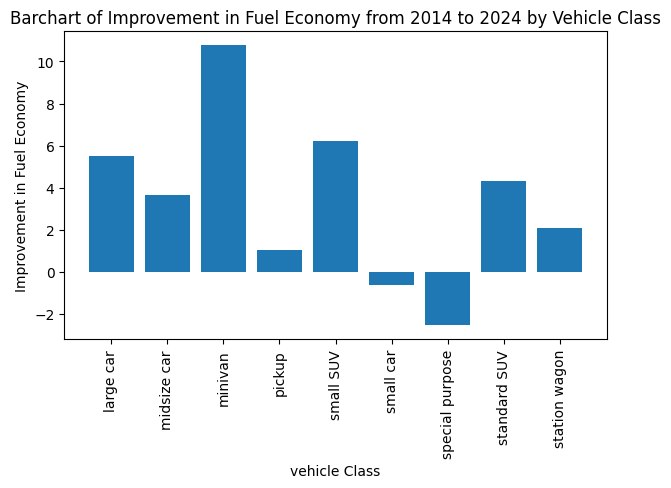

In [476]:
# plotting graph
plt.subplots(figsize=(7,4))
plt.bar(variance.index, variance)
plt.title("Barchart of Improvement in Fuel Economy from 2014 to 2024 by Vehicle Class")
plt.xlabel("vehicle Class")
plt.xticks(rotation=90)
plt.ylabel("Improvement in Fuel Economy")

<h3>Answer:</h3>

<font size='3'> Minivan has the highest improvements in fuel economy followed by small SUV and large car. While there also a decrement in fuel ecnomy for vehicle class such as small car and special purpose.<br>(A Special Purpose vehicle (SPV) refers to a type of vehicle that is designed and built for a specific, specialized function, rather than for general transportation. These vehicles are typically customized to serve particular industry or operational needs and are not designed for regular passenger or cargo transport.)


<font size='4'>Q3: For all of the models that were produced in 2014 that are still being produced now in 2024, how much has the combined mpg improved and which vehicle improved the most?

<font size='3'>To find the answer for above question we need to merge two datasets!


In [477]:
# rename 2014 columns to distinguish between two dataset
df_14=df_14.rename(columns = (lambda x: x[:10] + '_2014'))

In [478]:
df_14.head()

,model_2014_2014,displ_2014_2014,cyl_2014_2014,trans_2014_2014,drive_2014_2014,fuel_2014_2014,veh_class__2014,air_pollut_2014,city_mpg_2_2014,hwy_mpg_20_2014,cmb_mpg_20_2014,greenhouse_2014,smartway_2_2014
0,ACURA ILX,1.5,4,SCV-7,2WD,Gasoline,small car,9.0,39.0,38.0,38.0,9,Yes
1,ACURA ILX,2.0,4,SemiAuto-5,2WD,Gasoline,small car,6.0,24.0,35.0,28.0,7,Yes
2,ACURA ILX,2.4,4,Man-6,2WD,Gasoline,small car,6.0,22.0,31.0,25.0,6,No
3,ACURA MDX,3.5,6,SemiAuto-6,4WD,Gasoline,small SUV,6.0,18.0,27.0,21.0,5,No
4,ACURA MDX,3.5,6,SemiAuto-6,2WD,Gasoline,small SUV,6.0,20.0,28.0,23.0,6,No


In [479]:
df_merge=pd.concat([df_14,df_24],axis=1,join='inner') #This would join both Dataset on rows

In [ ]:
#creating a new dataframe model_mpg that give mean() of 2014 and 2024 cmb_mpg for each 

In [ ]:
model_mpg=df_merge.groupby('model')[['cmb_mpg_2014','cmb_mpg']].mean()

In [481]:
model_mpg.head()

,cmb_mpg_2014,cmb_mpg,change_mpg
model,,,
ACURA Integra,33.0,28.5,-4.5
ACURA Integra A-Spec,23.0,31.0,8.0
ACURA MDX,22.5,21.5,-1.0
ACURA MDX Type-S,23.0,19.0,-4.0
ACURA RDX,30.0,23.0,-7.0


In [482]:
model_mpg.shape

(622, 3)

In [483]:
# creating new column with represents the change in cmb_mpg

In [446]:
model_mpg['change_mpg']=model_mpg['cmb_mpg']-model_mpg['cmb_mpg_2014']

In [447]:
model_mpg.head()

,cmb_mpg_2014,cmb_mpg,change_mpg
model,,,
ACURA Integra,33.0,28.5,-4.5
ACURA Integra A-Spec,23.0,31.0,8.0
ACURA MDX,22.5,21.5,-1.0
ACURA MDX Type-S,23.0,19.0,-4.0
ACURA RDX,30.0,23.0,-7.0


<Axes: >

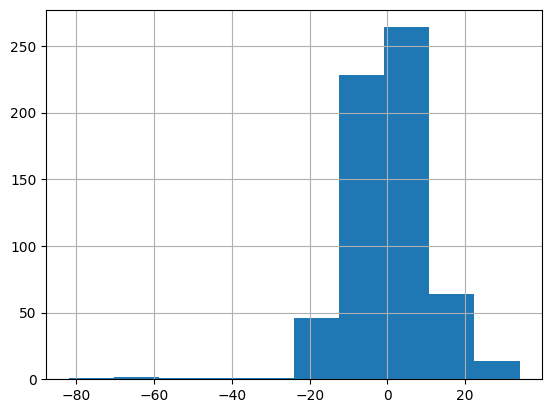

In [448]:
model_mpg['change_mpg'].hist()

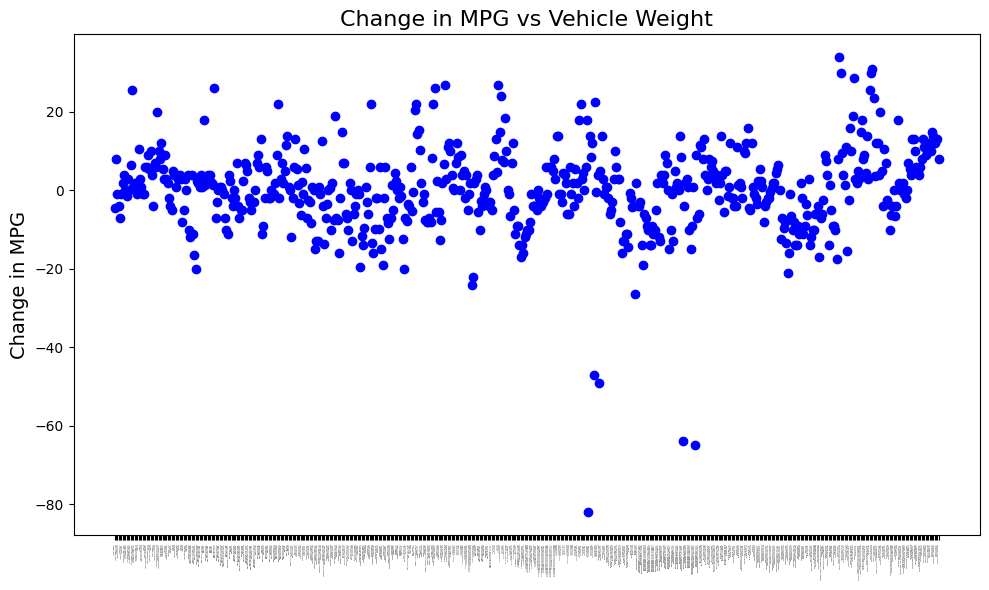

In [469]:
plt.figure(figsize=(10, 6))
plt.scatter(model_mpg.index, model_mpg['change_mpg'], color='blue')  # Scatter plot
plt.title("Change in MPG", fontsize=16)
plt.xticks(rotation=90, fontsize=1)
plt.ylabel("Change in MPG", fontsize=14)
plt.tight_layout()  # Automatically adjust layout
plt.show()

In [453]:
#finding the vehicle that improved the most
max_model_mpg_change=model_mpg['change_mpg'].max()
max_model_mpg_change

34.0

In [454]:
# Name of vehicle
model_mpg[model_mpg['change_mpg']==max_model_mpg_change]

,cmb_mpg_2014,cmb_mpg,change_mpg
model,,,
TOYOTA Camry Hybrid LE,18.0,52.0,34.0


<font size='3'> So TOYOTA Camry Hybrid LE is the vehicle with most improvment in fuel economy with 188.8 % increase from 2014 to 2024.

<font size='3'> From the above scatter plot we can see there is single vehicle that has highest decrement in fuel economy lets find that vehical.

In [486]:
min_model_mpg_change=model_mpg['change_mpg'].min()

In [487]:
model_mpg[model_mpg['change_mpg']==min_model_mpg_change]

,cmb_mpg_2014,cmb_mpg,change_mpg
model,,,
LEXUS RX 450h+,117.0,35.0,-82.0


<font size='3'> So LEXUS RX 450h+ is the vehicle model with most decrement in fuel economy from 2014 to 2024 with 70.08% decrease.